In [1]:
import dropbox as db

In [23]:
dbx = db.Dropbox('3xr6gRMjL5AAAAAAAABHSTsOTUd_es-5Q6n_GPSkx790KlsCv7Nc4grrOGoyPDhz')
dbx.users_get_current_account()

FullAccount(account_id='dbid:AAAPaFbgZ900rnnN_KWiWuO_xeCLY-ftv8c', name=Name(given_name='Lab', surname='Jhe', familiar_name='Jhe Lab', display_name='Jhe Lab', abbreviated_name='JL'), email='jhelab.snu@gmail.com', email_verified=True, disabled=False, locale='ko', referral_link='https://www.dropbox.com/referrals/AABhUqxwE3HfZM4rvYYsQvzJ4lpXK8vKTzk?src=app9-6811472', is_paired=False, account_type=AccountType('pro', None), root_info=UserRootInfo(root_namespace_id='4797143216', home_namespace_id='4797143216'), profile_photo_url=None, country='KR', team=None, team_member_id=None)

In [27]:
print(dbx.files_list_folder(path="/23-215 ML AFM/Data").entries)

[FolderMetadata(name='Shear mode', id='id:ZawDs6pRfVAAAAAAAASjkQ', path_lower='/23-215 ml afm/data/shear mode', path_display='/23-215 ml afm/Data/Shear mode', parent_shared_folder_id=None, shared_folder_id=None, sharing_info=None, property_groups=None), FolderMetadata(name='Tapping mode', id='id:ZawDs6pRfVAAAAAAAASjkw', path_lower='/23-215 ml afm/data/tapping mode', path_display='/23-215 ml afm/Data/Tapping mode', parent_shared_folder_id=None, shared_folder_id=None, sharing_info=None, property_groups=None), FolderMetadata(name='2019.03.29', id='id:ZawDs6pRfVAAAAAAAATBgg', path_lower='/23-215 ml afm/data/2019.03.29', path_display='/23-215 ml afm/Data/2019.03.29', parent_shared_folder_id=None, shared_folder_id=None, sharing_info=None, property_groups=None), FolderMetadata(name='General mode', id='id:ZawDs6pRfVAAAAAAAAURcg', path_lower='/23-215 ml afm/data/general mode', path_display='/23-215 ml afm/Data/General mode', parent_shared_folder_id=None, shared_folder_id=None, sharing_info=None

In [1]:
from cp_detection.FileParse import FileParser, Json2App
from cp_detection.ApproachCurve import ApproachCurve

In [2]:
data_dir = './Data/Experiment/Tapping'
files = FileParser(data_dir, 'app', 'json')

34 files loaded


In [3]:
converter = Json2App(files[1])
app_curve = converter()

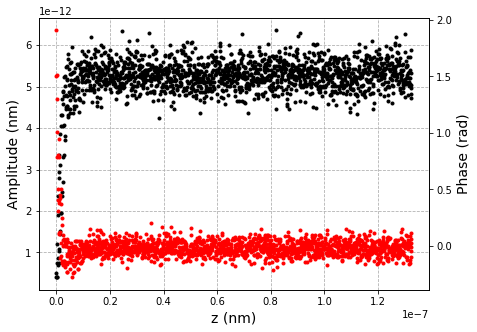

In [5]:
fig, ax = app_curve.PlotData()

In [6]:
fig.__dict__

{'_stale': True,
 'stale_callback': None,
 'figure': None,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 'callbacks': <matplotlib.cbook.CallbackRegistry at 0x7fe6a27e4a50>,
 'bbox_inches': Bbox([[0.0, 0.0], [7.0, 5.0]]),
 'dpi_scale_trans': <matplotlib.transforms.Affine2D at 0x7fe6a27e4c90>,
 '_dpi': 72.0,
 'bbox': <matplotlib.transforms.TransformedBbox at 0x7fe6a27e4150>,
 'transFigure': <matplotlib.transforms.BboxTransformTo at 0x7fe6a27e47d0>,
 'patch': <matplotlib.patches.Rectangle at 0x7fe6a27e4710>,
 'canvas': <matplotlib.backend

In [5]:
import json
with open(files[0]) as json_file:
    json_data = json.load(json_file)
json_data.keys()

dict_keys(['type', 'w', 'Q', 'w0', 'C0_C', 'phas_offset', 'I0_r', 'sens', 'piezoCf', 'IVgain', 'z', 'amp_r', 'phas_r', 'k', 'gnd', 'amp_e', 'phas_e', 'amp', 'phas', 'k_int', 'b_int', 'Fk1', 'Fk2', 'Fb', 'Edis', 'A0', 'Omega'])